In [8]:
import numpy as np
import matplotlib.pyplot as plt

This code was created by Guilherme Vieira (@guilhermesechat/sechat.blog for the youtube channel https://www.youtube.com/user/guilhermewellsful).

In [559]:
#number of divisions
div = 1E4
#time-step
step = 1E-12
#constats for the Lennard-Jones potential
m = 6.7E-26
sig = 3.4E-10
eps = 1.65E-21
t_tot = step*div

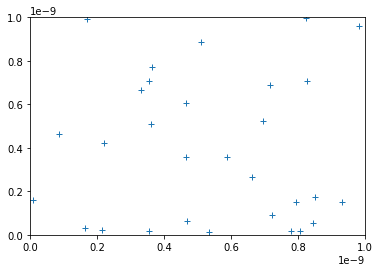

In [560]:
#O número de partículas é N
N = 30
L = 1E-9
#defining the 3 main positions, past, present, future
particles_prev = np.zeros((N,2))
particles = np.zeros((N,2))
particles_fut = np.zeros((N,2))

#initial random values in a square box
Initial = np.array([[np.random.rand()*L,np.random.rand()*L] for i in range(N)])

#particles_prev = Initial[:]
#particles = Initial[:]
np.copyto(particles   _prev,Initial)
np.copyto(particles,Initial)

plt.plot(particles_prev[:,0],particles_prev[:,1],'+')
plt.ylim(0,L)
plt.xlim(0,L)
plt.show()

In [561]:
#defining distances for on particle, it gives an array with all distances from on particle to the others and itself, 0
distancia = np.zeros(N,dtype=complex)
def dist(i):
    for c in range(N):
        dif = particles_prev[i] - particles_prev[c]
        distancia[c] = np.linalg.norm(dif) +1j*np.angle(dif[0] + 1j*dif[1])
        #it gives the magnitude and the angle of interaction, that's why a complex value
    return distancia

In [562]:
#the next position for a particle i, based on its present and previous values, and the for contribution
def prox_pos(i):
    particles_fut[i,:] = np.dot(2,particles[i,:]) - particles_prev[i,:] + np.dot(((step**2)/m),force)
    #condições de contorno periódicas estilo pac-man, se uma partícula sai na direita, ela aparece na esquerda, não leva em conta perceber partícula periodicamente, a força só atua na sua caixa, preguiça
    if particles_fut[i,0] < 0:
        particles_fut[i,0] = particles_fut[i,0] + ((abs(particles_fut[i,0])//L)+1)*L
    elif particles_fut[i,0] > L:
        particles_fut[i,0] = particles_fut[i,0] - (abs(particles_fut[i,0])//L)*L                    
                
    if particles_fut[i,1] < 0:
        particles_fut[i,1] = particles_fut[i,1] + ((abs(particles_fut[i,1])//L)+1)*L   
    elif particles_fut[i,1] > L:
        particles_fut[i,1] = particles_fut[i,1] - (abs(particles_fut[i,1])//L)*L    
    return particles_fut[i,:]

In [563]:
def F(i):
    #the force acting on a particle, it gives at the end fx an fy, 
    f = np.zeros((2))
    PE = 0
    for u in range(N):
        dist(i)
        d = np.real(dist(i)[u])
        #limiting the range of the force
        if d == 0 or d > 2.5*sig:
            f = f + np.array([0,0])
            PE += 0
        else:
            force = ((48/d)*eps*((sig/d)**12 - (1/2)*(sig/d)**6))
            angle = np.imag(dist(i))[u]
            f = f + np.array([force*np.cos(angle),force*np.sin(angle)])
            #to prevent repeated potential energy calculations from particle 1 to 2 and 2 to 1, for examplea
            if u > i:
                PE += (4*eps*((sig/d)**12 - (sig/d)**6))

    return f,PE

In [1]:
Kin_En = []
T_Pot_En = []
#time evolution
for t in range(1,int(div)):
    Pot_En = 0
    #for each time evolution we see to every particle in the system
    for i in range(N):
        force, PE = F(i)
        prox_pos(i)
        #acumulation potencial energy per particle interaction
        Pot_En += PE
    
    #print('prev',particles_prev[:])
    #print('pres',particles[:])
    #print("muda tempo")
    #acumulating potencial energy per time-step, and averaging kinetic energy
    T_Pot_En.append(Pot_En)
    Kin_En.append(np.dot(m/(2*N),np.sum((np.dot(1/(step),particles_fut[:] - particles[:]))**2)))
    
    #updating the values of the arrays for the next interaction
    np.copyto(particles_prev,particles)
    np.copyto(particles,particles_fut)
    
    plt.plot(particles_fut[:,0],particles_fut[:,1],'+')
    plt.ylim(0,L)
    plt.xlim(0,L)
    plt.savefig('moldyn/fig' + str(t).rjust(10, '0') + '.png')
    plt.show()

NameError: name 'div' is not defined

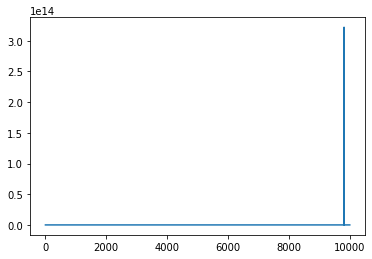

In [565]:
plt.plot(np.arange(div-1),Kin_En)
plt.show()

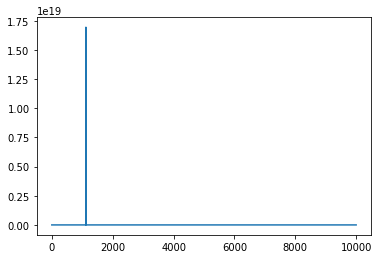

In [566]:
plt.plot(np.arange(div-1),T_Pot_En)
plt.show()

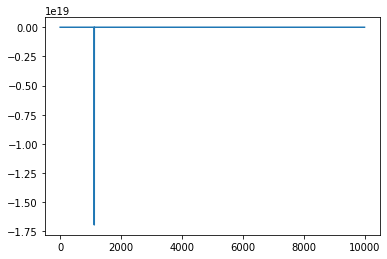

In [567]:
#kinentic energy less potential energy should be zero, idealy...
plt.plot(np.arange(div-1),np.array(Kin_En) - np.array(T_Pot_En))
plt.show()

In [ ]:
import gif
Kin_En = []
T_Pot_En = []
@gif.frame
def rodada(N):
    Pot_En = 0
    for i in range(N):
        for j in range(N):
            prox_pos(i,j)
            Pot_En += pot
    T_Pot_En.append(Pot_En)
    Kin_En.append((1/2)*(np.dot(1/(N**2),np.sum(np.linalg.norm(np.dot(1/(step),particles_fut[:,:] - particles[:,:]))))))
    
    np.copyto(particles_prev,particles)
    np.copyto(particles,particles_fut)
    
    plt.plot(particles_fut[:,:,0],particles_fut[:,:,1],'+')
    plt.ylim(0,L)
    plt.xlim(0,L)
    #plt.show()
    return T_Pot_En,Kin_En

frames = []
for t in range(1,int(div)):
    print("Tempo restante", int(div) - t)
    frame = rodada(N)
    frames.append(frame)

gif.save(frames, "gas.gif", duration=300)    